# Field Type: Real Image Height

This notebook demonstrates the `RealImageHeightField` type, where fields are defined by the intersection height of the real chief ray at the image plane. This differs from the paraxial image height, which uses linear paraxial approximations.

In [1]:
import optiland.backend as be
from optiland.optic import Optic

In [2]:
class CookeTriplet(Optic):
    """A Cooke triplet lens design."""

    def __init__(self):
        super().__init__()

        self.add_surface(index=0, radius=be.inf, thickness=be.inf)
        self.add_surface(index=1, radius=22.01359, thickness=3.25896, material="SK16")
        self.add_surface(index=2, radius=-435.76044, thickness=6.00755)
        self.add_surface(index=3, radius=-22.21328, thickness=0.99997, material=("F2", "schott"))
        self.add_surface(index=4, radius=20.29192, thickness=4.75041, is_stop=True)
        self.add_surface(index=5, radius=79.68360, thickness=2.95208, material="SK16")
        self.add_surface(index=6, radius=-18.39533, thickness=42.20778)
        self.add_surface(index=7)

        self.set_aperture(aperture_type="EPD", value=10)

        # Set Field Type to RealImageHeightField
        self.set_field_type(field_type="real_image_height")
        
        # Add fields at specific real image heights (mm)
        self.add_field(y=0)
        self.add_field(y=12)
        self.add_field(y=18)

        self.add_wavelength(value=0.48)
        self.add_wavelength(value=0.55, is_primary=True)
        self.add_wavelength(value=0.65)

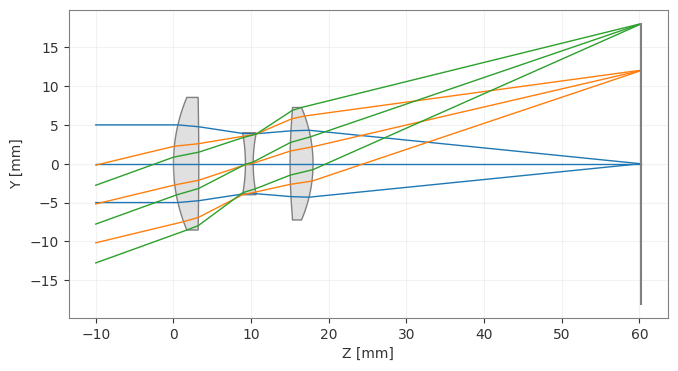

In [3]:
lens = CookeTriplet()
_ = lens.draw()

In [4]:
# Verify Real Image Heights
print("Verifying Real Image Heights...")
max_field = lens.fields.max_field
print(f"Max Field: {max_field} mm")

# Normalized field coordinates for the added fields
Hx = be.array([0, 0, 0])
Hy = be.array([0, 12/max_field, 18/max_field])

# Trace chief rays (Pupil = 0,0) at primary wavelength
rays = lens.trace_generic(Hx, Hy, Px=0, Py=0, wavelength=0.55)

print("\nTarget Height vs Actual Image Height:")
for target, actual in zip(Hy * max_field, rays.y):
    print(f"Target: {target:.4f} mm, Actual: {actual:.4f} mm, Error: {abs(target - actual):.4e} mm")

Verifying Real Image Heights...
Max Field: 18.0 mm

Target Height vs Actual Image Height:
Target: 0.0000 mm, Actual: 0.0000 mm, Error: 0.0000e+00 mm
Target: 12.0000 mm, Actual: 12.0000 mm, Error: 1.2434e-14 mm
Target: 18.0000 mm, Actual: 18.0000 mm, Error: 2.4869e-14 mm
